In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from scipy.stats import norm
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

### Homoscedastic errors

$$\hat \mu = \frac{1}{N}\sum_{i=1}^N x_i$$ mean estimator for a gaussian distributed sample with homoscedastic uncertainties.

$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}$$ error on the mean estimator for a gaussian distributed sample with homoscedastic uncertainties.

So, our estimator of $\mu$ is $\overline{x}\pm\frac{\sigma}{\sqrt{N}}$, which is a result that you should be familiar with.

In [2]:
mu, sigma, N = 1, 0.2, 100 # mean, standard deviation and number of measurements
sample = np.random.normal(mu, sigma, N)

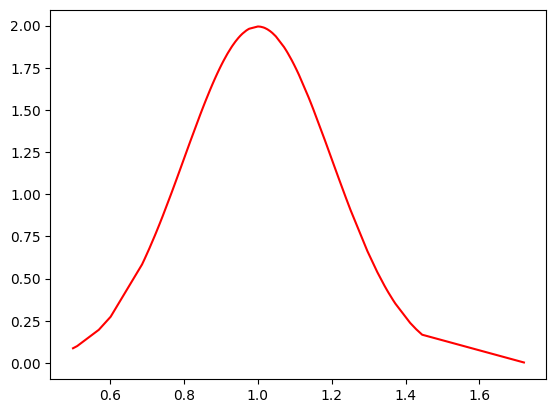

In [3]:
plt.plot(np.sort(sample), norm.pdf(np.sort(sample), mu, sigma), '-r')
plt.show()

In [4]:
mu_proposed = np.linspace(0,2,1000)

In [5]:
# compute the lnL for each possible mu.
lnL_scan = []
for mu_i in mu_proposed:
    lnL_temp = norm.logpdf(sample, mu_i, sigma) # gives you the log prob. density; useful!
    lnL_temp = np.sum(lnL_temp) # sum over the log pmf of all data points
    lnL_scan.append(lnL_temp)

In [6]:
# convert to numpy array
lnL_scan = np.array(lnL_scan)

# mu_proposed that maximizes the lnL.
findmax = mu_proposed[np.argmax(lnL_scan)]
print(f"true mean ={mu: .2f}")
print(f"mean estimator ={findmax: .4f}")
print(f"sample arithmetic mean ={np.mean(sample): .4f}")

true mean = 1.00
mean estimator = 0.9910
sample arithmetic mean = 0.9912


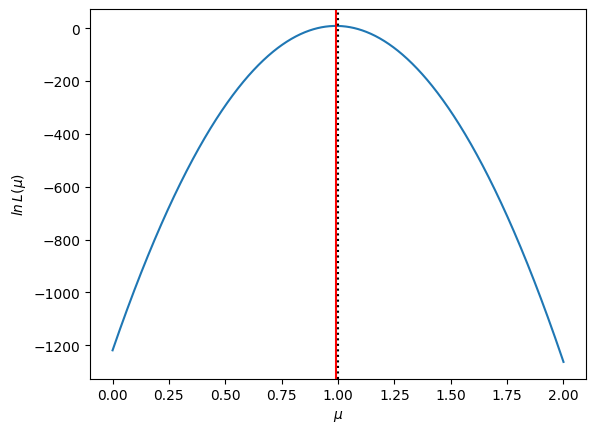

In [7]:
plt.plot(mu_proposed, lnL_scan)
plt.axvline(findmax,c='red')
plt.axvline(1,c='black',ls='dotted')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$ln\,L(\mu)$')
plt.show()

In [8]:
diff2_lnL = np.diff(lnL_scan, 2)

In [9]:
d2_lnL = diff2_lnL/(0.002*np.ones(len(diff2_lnL)))**2

In [10]:
vec_mu_error = 1/np.sqrt(-1*d2_lnL)
mu_error = vec_mu_error[np.argmax(lnL_scan)]

In [11]:
print(f"error on the mean estimator ={mu_error: .4f}")
print(f"error on the sample arithmetic mean ={sigma/np.sqrt(N): .4f}")

error on the mean estimator = 0.0200
error on the sample arithmetic mean = 0.0200


### Heteroscedastic errors

$$\hat \mu = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)}$$ mean estimator for a gaussian distributed sample with heteroscedastic uncertainties.

$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}$$ error on the mean estimator for a gaussian distributed sample with heteroscedastic uncertainties.

In [12]:
s_mu, s_sigma = 0.2, 0.05 # mean and standard deviation of measurement errors
sigma_sample = np.random.normal(s_mu, s_sigma, N)

In [13]:
pos_sample = []
for sigma_i in sigma_sample:
    pos_sample.append(np.random.normal(mu, sigma_i))

In [14]:
pos_sample = np.array(pos_sample)

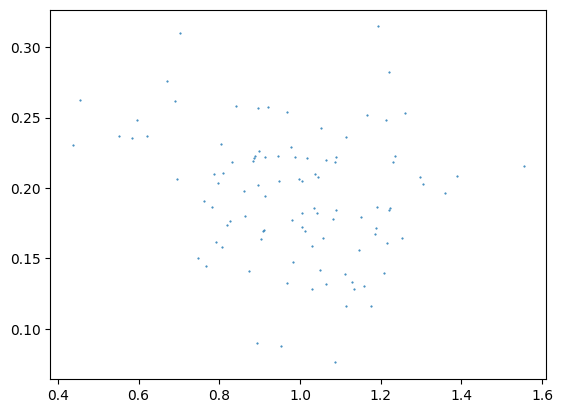

In [15]:
plt.plot(pos_sample, sigma_sample, markersize=1, marker='.', linestyle="")
plt.show()

In [16]:
lnL_scan = []
for mu_i in mu_proposed:
  lnL_temp = []
  for i in range(len(sigma_sample)):
    lnL_temp.append(norm.logpdf(pos_sample[i], mu_i, sigma_sample[i])) # gives you the log prob. density; useful!
  lnL_temp = np.array(lnL_temp)
  lnL_scan.append(np.sum(lnL_temp)) # sum over the log pmf of all data points

In [17]:
# convert to numpy array
lnL_scan = np.array(lnL_scan)

# mu_proposed that maximizes the lnL
findmax = mu_proposed[np.argmax(lnL_scan)]

# definition of the weights
pesi = 1/sigma_sample**2
valori = pos_sample

print(f"true mean ={mu: .2f}")
print(f"mean estimator ={findmax: .4f}")
print(f"sample mean ={np.average(valori, weights=pesi): .4f}")

true mean = 1.00
mean estimator = 1.0050
sample mean = 1.0046


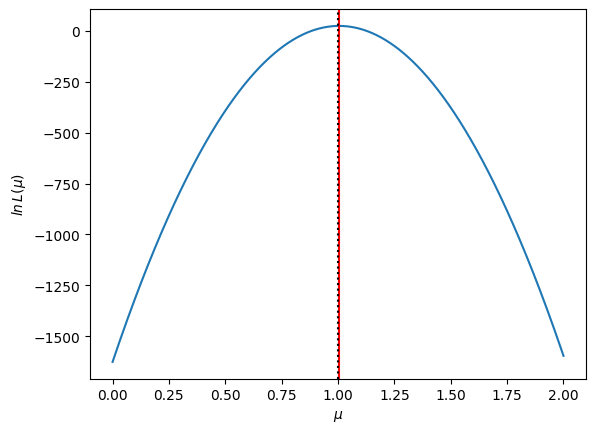

In [18]:
plt.plot(mu_proposed, lnL_scan)
plt.axvline(findmax,c='red')
plt.axvline(1,c='black',ls='dotted')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$ln\,L(\mu)$')
plt.show()

In [19]:
diff2_lnL = np.diff(lnL_scan, 2)
d2_lnL = diff2_lnL/(0.002*np.ones(len(diff2_lnL)))**2
vec_mu_error = 1/np.sqrt(-1*d2_lnL)
mu_error = vec_mu_error[np.argmax(lnL_scan)]

In [21]:
print(f"error on the mean estimator ={mu_error: .4f}")
print(f"error on the sample mean ={np.sum(pesi)**-0.5: .4f}")

error on the mean estimator = 0.0175
error on the sample mean = 0.0175
